## Biomechanical features of orthopedic patients

Classifying patients based on six features



In [134]:
import pandas as pd

df = pd.read_csv("/home/gabriel/Documents/MachineLearning-Files/Exercicios/Datasets/column_2C_weka.csv")


In [135]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,Abnormal


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB


In [137]:
df.shape

(310, 7)

In [138]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

In [139]:
df['class'] = df['class'].replace('Abnormal', 1)
df['class'] = df['class'].replace('Normal', 0)

In [140]:
df.head()

,pelvic_incidence,pelvic_tilt numeric,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,1
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,1
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,1
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,1
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,1


In [141]:
df['class'].value_counts()

1    210
0    100
Name: class, dtype: int64

In [142]:
faltantes = df.isnull().sum()
print(faltantes)

pelvic_incidence            0
pelvic_tilt numeric         0
lumbar_lordosis_angle       0
sacral_slope                0
pelvic_radius               0
degree_spondylolisthesis    0
class                       0
dtype: int64


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


ok!!!

In [144]:
#Separating the data
y = df["class"]
x = df.drop('class', axis=1)

In [145]:
import numpy as np 
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

#Definindo os valores que serão testados em DecisionTree:
minimos_split = np.array([1, 3, 4, 5, 6, 7, 8])
maximo_nivel = np.array([3, 4, 5, 6])
algoritmo = ['gini', 'entropy']
valores_grid = {'min_samples_split':minimos_split,'max_depth':maximo_nivel, 'criterion':algoritmo}

#Criação do modelo:
modelo = DecisionTreeClassifier()

#Criando os grids:
gridDecisionTree = GridSearchCV(estimator=modelo, param_grid=valores_grid, cv=5)
gridDecisionTree.fit(x,y)



/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: 

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: 

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: 

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 890, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: 

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([3, 4, 5, 6]),
                         'min_samples_split': array([1, 3, 4, 5, 6, 7, 8])})

In [146]:
#imprimindo os melhores resultados:
print("Mínimo split:", gridDecisionTree.best_estimator_.min_samples_split)
print("Máxima profundidade:", gridDecisionTree.best_estimator_.max_depth)
print("Algoritmo escolhido:", gridDecisionTree.best_estimator_.criterion)
print("Acurácia:", gridDecisionTree.best_score_)

Mínimo split: 5
Máxima profundidade: 5
Algoritmo escolhido: entropy
Acurácia: 0.7774193548387097


In [151]:
from sklearn.tree import DecisionTreeRegressor

# Defining the values that will be tested in DecisionTree:
min_split = np.array([1, 2, 3, 5, 6, 7, 8, 10, 12, 15, 20, 32])
max_nivel = np.array([1, 2, 3, 5, 6, 7, 9, 11, 13, 15, 23, 64])
algoritmo = ['mse', 'friedman_mse', 'mae', 'poisson']
val_grid = {'min_samples_split':min_split, 'max_depth':max_nivel,
            'criterion':algoritmo}

#Creating the model:
modelo = DecisionTreeRegressor()

#Creating the Grids:

gdt = GridSearchCV(estimator=modelo, param_grid=val_grid, cv=5)
gdt.fit(x, y)

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 228, in fit
    raise ValueError("min_samples_split must be an integer "
ValueError: min_samples_split must be an integer greater than 1 or a float in (0.0, 1.0]; got the integer 1

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548:

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 1242, in fit
    super().fit(
  File "/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/tree/_classes.py", line 336, in fit
    criterion = CRITERIA_REG[self.criterion](self.n_outputs_,
KeyError: 'poisson'

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/gabriel/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for the

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'criterion': ['mse', 'friedman_mse', 'mae', 'poisson'],
                         'max_depth': array([ 1,  2,  3,  5,  6,  7,  9, 11, 13, 15, 23, 64]),
                         'min_samples_split': array([ 1,  2,  3,  5,  6,  7,  8, 10, 12, 15, 20, 32])})

In [152]:
# Output the results:

print(f'Min Splits :: {gdt.best_estimator_.min_samples_split}')
print(f'Max Depth :: {gdt.best_estimator_.max_depth}')
print(f'Choosen Algoritm :: {gdt.best_estimator_.criterion}')
print(f'Mean Square Error :: {gdt.best_score_}')

Min Splits :: 2
Max Depth :: 1
Choosen Algoritm :: mae
Mean Square Error :: 0.15526315789473671


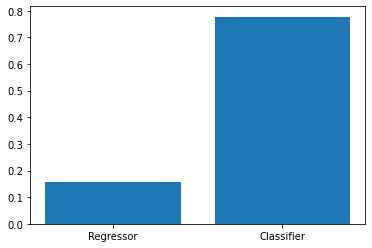

In [153]:
import matplotlib.pyplot as plt

group = ['Regressor', 'Classifier']
values = [gdt.best_score_, gridDecisionTree.best_score_ ]
plt.bar(group, values)
plt.show()

In [154]:
percentage = (gdt.best_score_/gridDecisionTree.best_score_)*100

In [156]:
print(f'{percentage:.2f}%')

19.97%
